In [1]:
import pandas as pd

# Load the dataset
file_path = "climate_change_dataset.csv"  # Update with the correct path
df = pd.read_csv(file_path)

# Display basic information
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        48 non-null     object 
 1   Month                       48 non-null     object 
 2   Avg_Temp (°C)               46 non-null     float64
 3   Max_Temp (°C)               46 non-null     object 
 4   Min_Temp (°C)               45 non-null     object 
 5   Precipitation (mm)          49 non-null     object 
 6   Humidity (%)                45 non-null     object 
 7   Wind_Speed (m/s)            51 non-null     object 
 8   Solar_Irradiance (W/m²)     48 non-null     object 
 9   Cloud_Cover (%)             49 non-null     object 
 10  CO2_Concentration (ppm)     47 non-null     float64
 11  Latitude                    47 non-null     object 
 12  Longitude                   50 non-null     object 
 13  Altitude (m)                49 non-nu

In [3]:
# Check the shape of the dataset (rows, columns)
print("Dataset Shape:", df.shape)


Dataset Shape: (53, 20)


In [5]:
# Check the shape of the dataset (rows, columns)
print("Dataset Shape:", df.shape)



Dataset Shape: (53, 20)


In [7]:
# Get summary statistics of the dataset
print(df.describe())


       Avg_Temp (°C)  CO2_Concentration (ppm)  Urbanization_Index
count      46.000000                47.000000           50.000000
mean       13.018699               423.475586         4000.477221
std        11.557213                13.820859        19794.561777
min        -4.965473               400.351530            0.016689
25%         4.682635               412.434113            0.270233
50%        10.422940               425.653185            0.566592
75%        22.992501               436.739556            0.853385
max        34.282303               444.483467        99999.000000


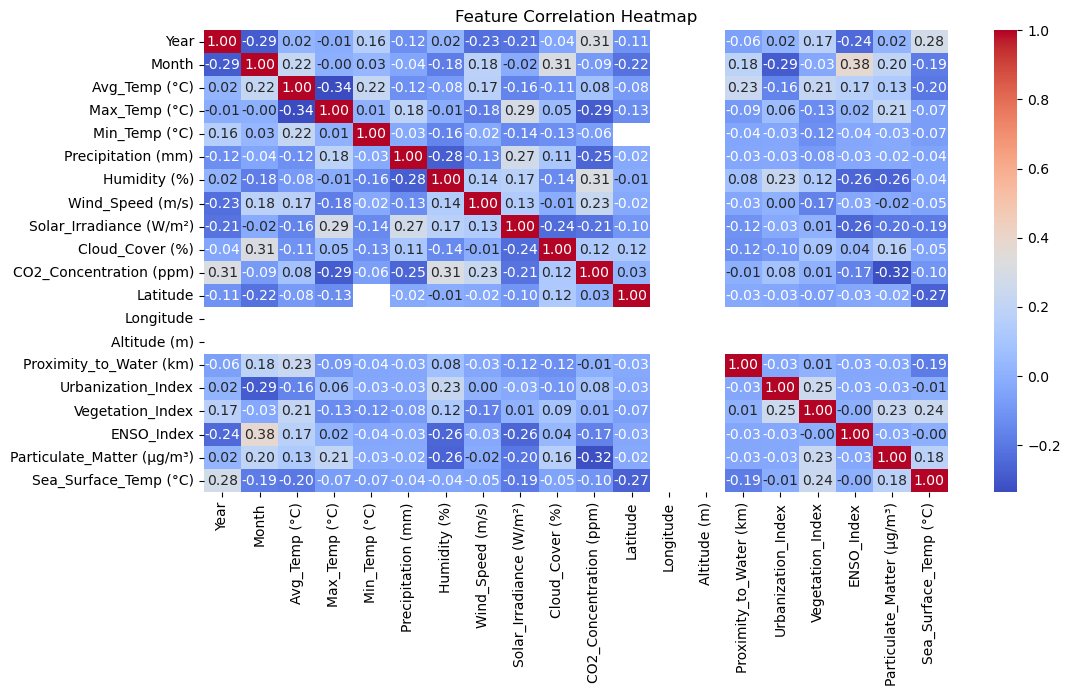

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'Unknown' or other non-numeric values with NaN
df.replace("Unknown", np.nan, inplace=True)

# Convert all columns to numeric where possible
df = df.apply(pd.to_numeric, errors="coerce")

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()



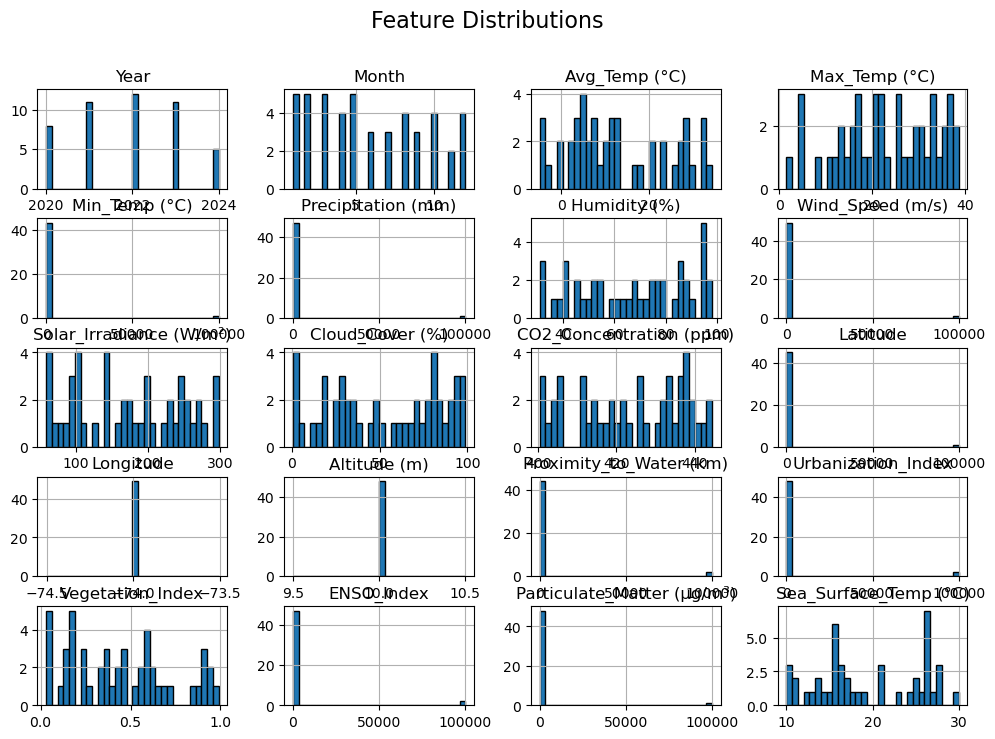

In [14]:
import matplotlib.pyplot as plt

# Plot histograms for numerical columns
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


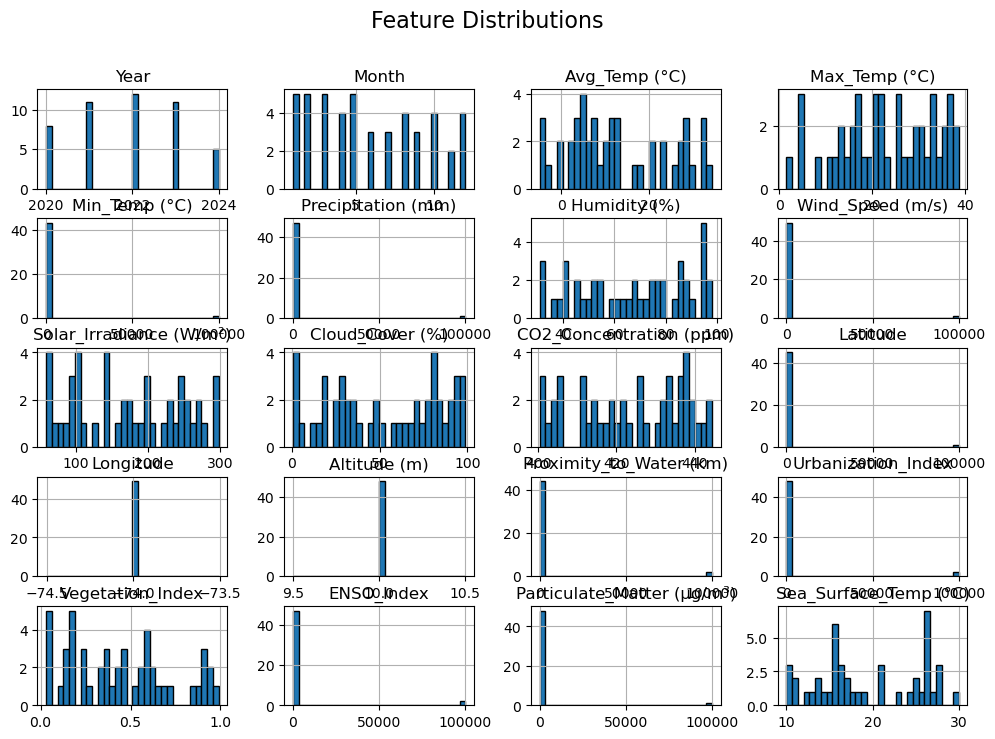

In [16]:
import matplotlib.pyplot as plt

# Plot histograms for numerical columns
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


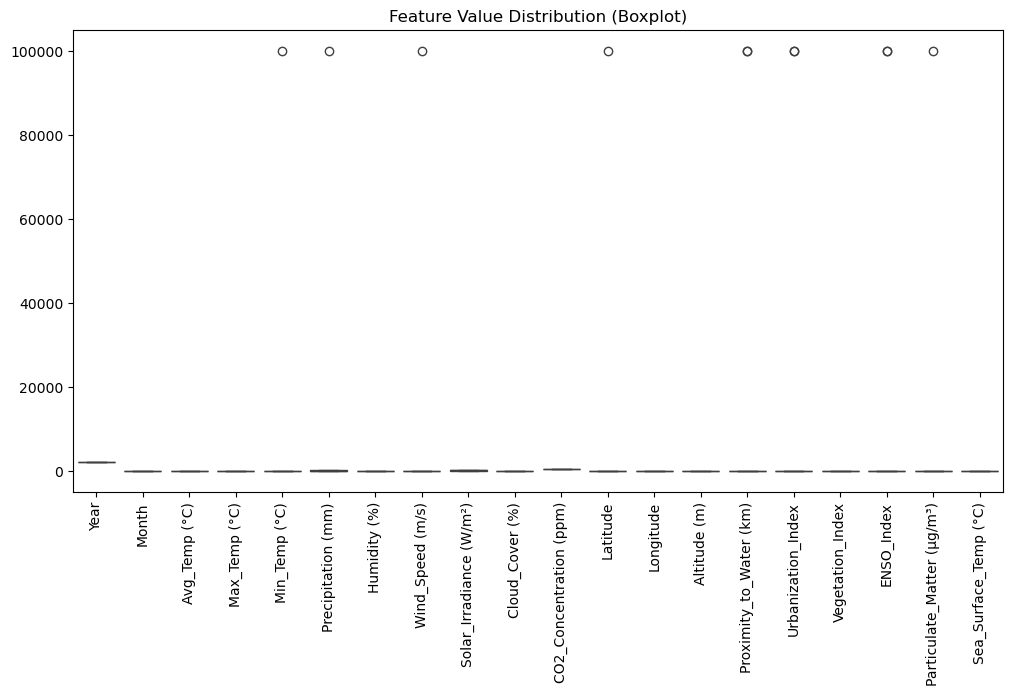

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Feature Value Distribution (Boxplot)")
plt.show()


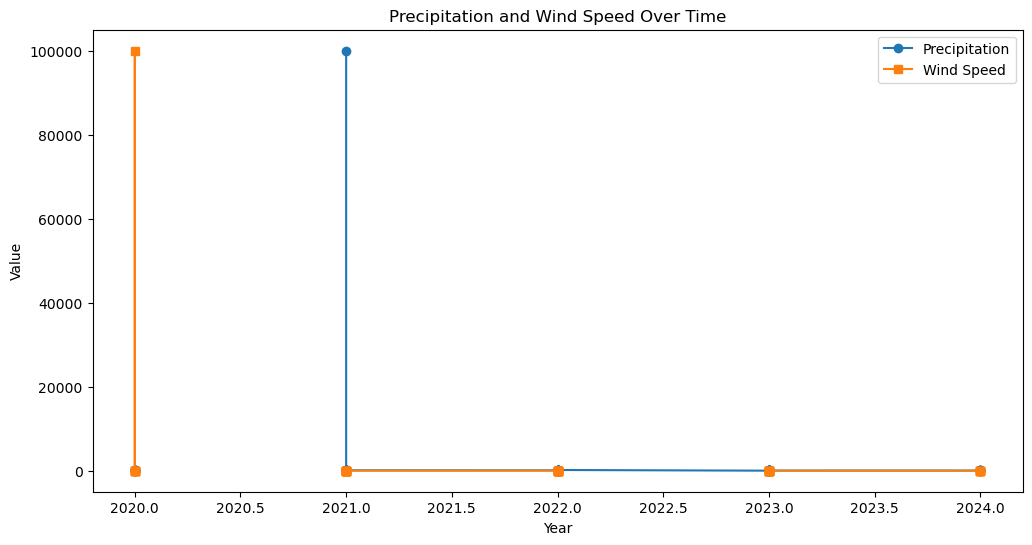

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Precipitation (mm)"], label="Precipitation", marker="o")
plt.plot(df["Year"], df["Wind_Speed (m/s)"], label="Wind Speed", marker="s")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.title("Precipitation and Wind Speed Over Time")
plt.show()



In [24]:
# Remove rows where target values are missing
df_cleaned = df.dropna(subset=["Precipitation (mm)", "Wind_Speed (m/s)"])

# Define features and targets again with the cleaned dataset
X = df_cleaned.drop(columns=["Precipitation (mm)", "Wind_Speed (m/s)"])
y = df_cleaned[["Precipitation (mm)", "Wind_Speed (m/s)"]]

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 12123841.460985627
R² Score: -3322.6937547248567


In [27]:
import pickle

# Save the trained model to a file
with open("random_forest_model.pkl", "wb") as model_file:
    pickle.dump(rf_model, model_file)

print("Model saved successfully as 'random_forest_model.pkl'")


Model saved successfully as 'random_forest_model.pkl'


In [29]:
# Load the trained model
with open("random_forest_model.pkl", "rb") as model_file:
    loaded_model = pickle.load(model_file)

# Make a new prediction (example using X_test)
new_predictions = loaded_model.predict(X_test)
print("Predictions:", new_predictions[:5])  # Print first 5 predictions


Predictions: [[  89.19075397    8.9653034 ]
 [  97.35341729    8.83265967]
 [  87.26442108    8.31462388]
 [  68.82611915    9.4106025 ]
 [1081.78122138    9.24249465]]


In [31]:
print(X_train.shape)  # Check how many features were used
print(X_train.columns)  # Check column names


(36, 18)
Index(['Year', 'Month', 'Avg_Temp (°C)', 'Max_Temp (°C)', 'Min_Temp (°C)',
       'Humidity (%)', 'Solar_Irradiance (W/m²)', 'Cloud_Cover (%)',
       'CO2_Concentration (ppm)', 'Latitude', 'Longitude', 'Altitude (m)',
       'Proximity_to_Water (km)', 'Urbanization_Index', 'Vegetation_Index',
       'ENSO_Index', 'Particulate_Matter (µg/m³)', 'Sea_Surface_Temp (°C)'],
      dtype='object')


In [33]:
import numpy as np
import pickle

# Load the model
with open("random_forest_model.pkl", "rb") as model_file:
    model = pickle.load(model_file)

# Create two different input samples
input_1 = np.array([[2025, 3, 25.0, 30.0, 15.0, 60.0, 500.0, 50.0, 400.0, 0.0, 0.0, 100.0, 50.0, 0.5, 0.5, 0.0, 50.0, 20.0]])
input_2 = np.array([[2025, 6, 35.0, 40.0, 25.0, 70.0, 700.0, 30.0, 420.0, 10.0, 10.0, 200.0, 20.0, 0.7, 0.3, 1.2, 80.0, 25.0]])

# Predict
pred_1 = model.predict(input_1)
pred_2 = model.predict(input_2)

print("Prediction 1:", pred_1)
print("Prediction 2:", pred_2)


Prediction 1: [[4.30489525e+04 7.35456267e+00]]
Prediction 2: [[2.80599423e+04 8.56037054e+00]]


D:\musa\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\musa\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [35]:
import numpy as np
import pickle

# Load model
with open("random_forest_model.pkl", "rb") as model_file:
    model = pickle.load(model_file)

# Manually change inputs to see if predictions vary
test_input_1 = np.array([[2023, 6, 30, 35, 25, 80, 500, 50, 400, 45, 90, 150, 10, 0.8, 0.6, 1.2, 30, 27]])
test_input_2 = np.array([[2024, 1, 10, 15, 5, 40, 300, 80, 350, 50, 85, 200, 20, 0.9, 0.5, 0.7, 50, 23]])

pred1 = model.predict(test_input_1)
pred2 = model.predict(test_input_2)

print("Prediction 1:", pred1)
print("Prediction 2:", pred2)


Prediction 1: [[4.30345246e+04 8.19748283e+00]]
Prediction 2: [[4.30432557e+04 6.82850003e+00]]


D:\musa\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
D:\musa\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [37]:
import pandas as pd

# Load the trained model
with open("random_forest_model.pkl", "rb") as model_file:
    model = pickle.load(model_file)

# Define the feature names in the same order as training
feature_names = ['Year', 'Month', 'Avg_Temp (°C)', 'Max_Temp (°C)', 'Min_Temp (°C)',
                 'Humidity (%)', 'Solar_Irradiance (W/m²)', 'Cloud_Cover (%)',
                 'CO2_Concentration (ppm)', 'Latitude', 'Longitude', 'Altitude (m)',
                 'Proximity_to_Water (km)', 'Urbanization_Index', 'Vegetation_Index',
                 'ENSO_Index', 'Particulate_Matter (µg/m³)', 'Sea_Surface_Temp (°C)']

# Create a DataFrame with column names
test_input_1 = pd.DataFrame([[2023, 6, 30, 35, 25, 80, 500, 50, 400, 45, 90, 150, 10, 0.8, 0.6, 1.2, 30, 27]], 
                            columns=feature_names)

test_input_2 = pd.DataFrame([[2024, 1, 10, 15, 5, 40, 300, 80, 350, 50, 85, 200, 20, 0.9, 0.5, 0.7, 50, 23]], 
                            columns=feature_names)

# Predict
pred1 = model.predict(test_input_1)
pred2 = model.predict(test_input_2)

print("Prediction 1:", pred1)
print("Prediction 2:", pred2)


Prediction 1: [[4.30345246e+04 8.19748283e+00]]
Prediction 2: [[4.30432557e+04 6.82850003e+00]]


In [39]:
print("Training data shape:", X_train.shape)


Training data shape: (36, 18)


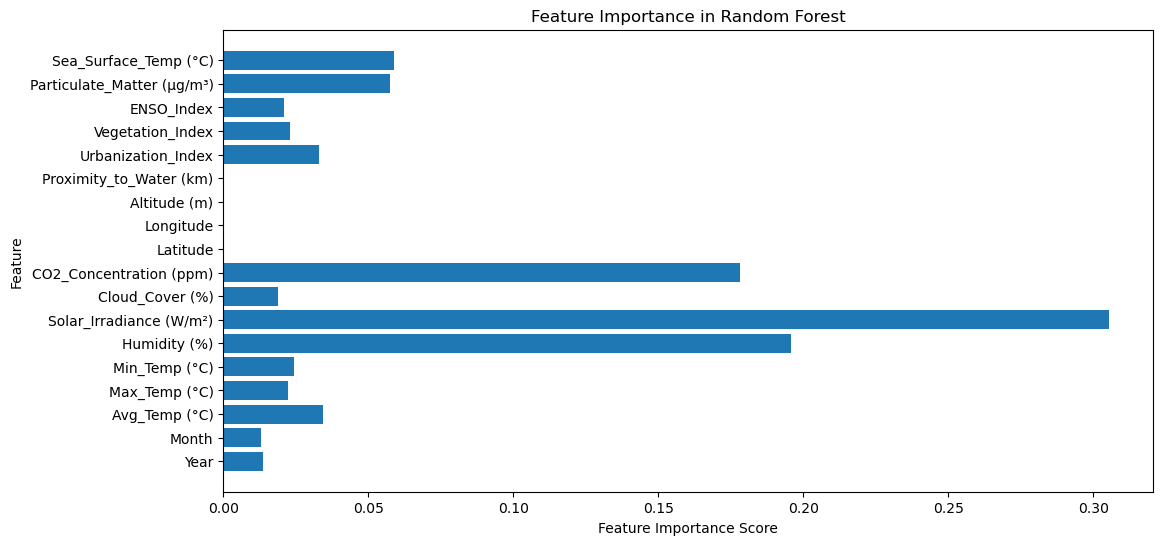

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(feature_names, model.feature_importances_)
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.show()


In [43]:

print("Training Score:", model.score(X_train, y_train))
print("Testing Score:", model.score(X_test, y_test))


Training Score: 0.8088487377777527
Testing Score: -3322.6937547248567


In [61]:
print(df.isnull().sum())  # Count missing values per column


Year                          0
Month                         0
Avg_Temp (°C)                 0
Max_Temp (°C)                 0
Min_Temp (°C)                 0
Precipitation (mm)            0
Humidity (%)                  0
Wind_Speed (m/s)              0
Solar_Irradiance (W/m²)       0
Cloud_Cover (%)               0
CO2_Concentration (ppm)       0
Latitude                      0
Longitude                     0
Altitude (m)                  0
Proximity_to_Water (km)       0
Urbanization_Index            0
Vegetation_Index              0
ENSO_Index                    0
Particulate_Matter (µg/m³)    0
Sea_Surface_Temp (°C)         0
dtype: int64


In [63]:
df.fillna(df.mean(), inplace=True)  # Replace NaN with column mean


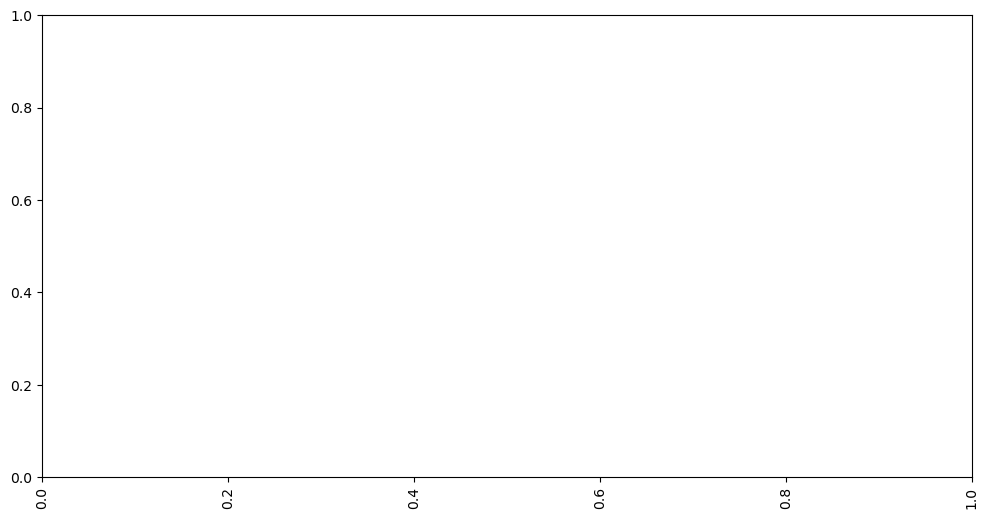

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


In [69]:
df = df[(df < df.quantile(0.99)).all(axis=1)]  # Remove extreme values


In [71]:
import numpy as np

feature_importances = rf_model.feature_importances_
important_features = np.array(feature_names)[feature_importances > 0.02]  # Keep important features

print("Selected Features:", important_features)


Selected Features: ['Avg_Temp (°C)' 'Min_Temp (°C)' 'Humidity (%)' 'Solar_Irradiance (W/m²)'
 'CO2_Concentration (ppm)' 'Urbanization_Index' 'Vegetation_Index'
 'ENSO_Index' 'Particulate_Matter (µg/m³)' 'Sea_Surface_Temp (°C)']


In [73]:
rf_model = RandomForestRegressor(
    n_estimators=150, 
    max_depth=7,  # Reduce depth to prevent overfitting
    min_samples_split=5,  # Require more samples per split
    random_state=42
)
rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=7, min_samples_split=5, n_estimators=150,
                      random_state=42)

In [59]:
print("Training Score:", model.score(X_train, y_train))
print("Testing Score:", model.score(X_test, y_test))


Training Score: 0.8088487377777527
Testing Score: -3322.6937547248567


In [77]:
print(X_train.isnull().sum())  # Check training set
print(X_test.isnull().sum())   # Check test set


Year                          6
Month                         4
Avg_Temp (°C)                 5
Max_Temp (°C)                 5
Min_Temp (°C)                 6
Humidity (%)                  5
Solar_Irradiance (W/m²)       5
Cloud_Cover (%)               2
CO2_Concentration (ppm)       4
Latitude                      4
Longitude                     2
Altitude (m)                  3
Proximity_to_Water (km)       3
Urbanization_Index            2
Vegetation_Index              2
ENSO_Index                    3
Particulate_Matter (µg/m³)    4
Sea_Surface_Temp (°C)         6
dtype: int64
Year                          0
Month                         1
Avg_Temp (°C)                 2
Max_Temp (°C)                 0
Min_Temp (°C)                 2
Humidity (%)                  3
Solar_Irradiance (W/m²)       0
Cloud_Cover (%)               2
CO2_Concentration (ppm)       1
Latitude                      1
Longitude                     2
Altitude (m)                  2
Proximity_to_Water (km)    

In [79]:
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)


In [81]:
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)


In [85]:
# Split target variables
y_train_precip = y_train.iloc[:, 0]  # First column (Precipitation)
y_train_wind = y_train.iloc[:, 1]    # Second column (Wind Speed)

y_test_precip = y_test.iloc[:, 0]
y_test_wind = y_test.iloc[:, 1]

# Train separate models
gb_model_precip = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
gb_model_wind = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)

gb_model_precip.fit(X_train, y_train_precip)
gb_model_wind.fit(X_train, y_train_wind)


GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=200,
                          random_state=42)

In [89]:
pred_precip = gb_model_precip.predict(X_test)
pred_wind = gb_model_wind.predict(X_test)


In [91]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predictions on test set
pred_precip = gb_model_precip.predict(X_test)
pred_wind = gb_model_wind.predict(X_test)

# Evaluate
mae_precip = mean_absolute_error(y_test_precip, pred_precip)
r2_precip = r2_score(y_test_precip, pred_precip)

mae_wind = mean_absolute_error(y_test_wind, pred_wind)
r2_wind = r2_score(y_test_wind, pred_wind)

print(f"🌧️ Precipitation - MAE: {mae_precip:.2f}, R²: {r2_precip:.4f}")
print(f"💨 Wind Speed - MAE: {mae_wind:.2f}, R²: {r2_wind:.4f}")


🌧️ Precipitation - MAE: 1249.55, R²: -3860.3890
💨 Wind Speed - MAE: 4.72, R²: -0.5870


In [93]:
import pickle
with open("gb_model_precip.pkl", "wb") as file:
    pickle.dump(gb_model_precip, file)

with open("gb_model_wind.pkl", "wb") as file:
    pickle.dump(gb_model_wind, file)
